# 1. Importing Libraries and Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv("loan_default.csv")
df.dropna(inplace=True)
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0


# 2. Dataset Shape and Summary Statistics

In [3]:
# Shape and summary
print("Rows:", df.shape[0], "Columns:", df.shape[1])
df.describe(include='all').T


Rows: 98187 Columns: 34


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,98187.0,NaN,NaN,NaN,99115.912524,42951.31409,24892.0,61770.0,99118.0,136261.5,173559.0
year,98187.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0
loan_limit,98187,2,cf,92399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,98187,4,Joint,29110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
approv_in_adv,98187,2,nopre,81254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_type,98187,3,type1,82223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_purpose,98187,4,p3,39231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_Worthiness,98187,2,l1,94428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_credit,98187,1,nopc,98187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_or_commercial,98187,2,nob/c,88074,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Loan Status by Region

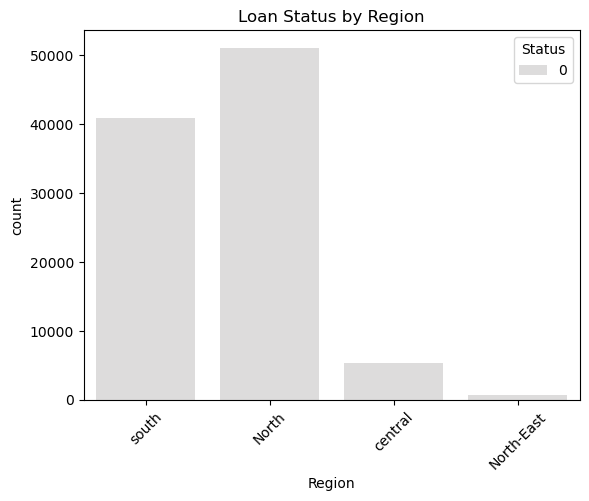

In [19]:
sns.countplot(data=df, x='Region', hue='Status', palette='coolwarm')
plt.title("Loan Status by Region")
plt.show()


# 4. Loan Status by Credit Worthiness

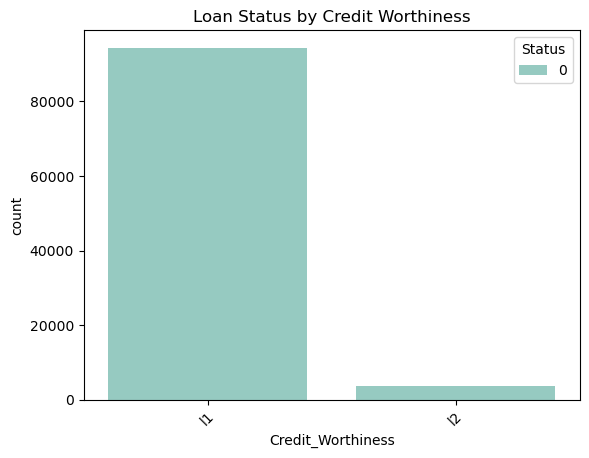

In [20]:
sns.countplot(data=df, x='Credit_Worthiness', hue='Status', palette='Set3')
plt.title("Loan Status by Credit Worthiness")
plt.xticks(rotation=45)
plt.show()

# 5. Loan Status by Gender

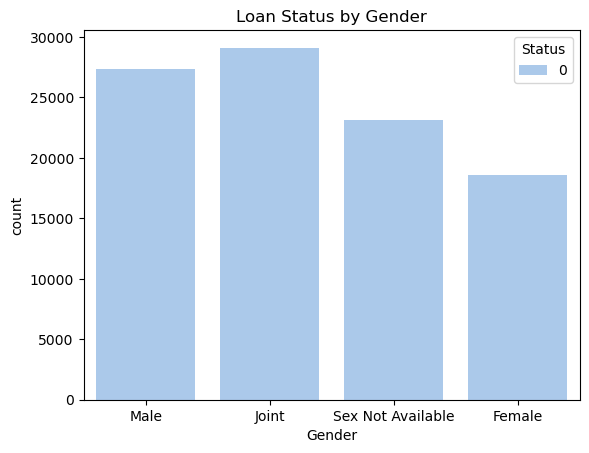

In [18]:
sns.countplot(data=df, x='Gender', hue='Status', palette='pastel')
plt.title("Loan Status by Gender")
plt.show()


# 6. Credit Score Distribution

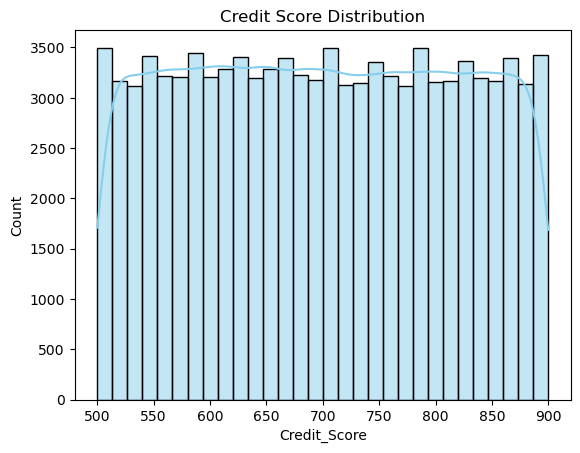

In [21]:
sns.histplot(df['Credit_Score'], kde=True, bins=30, color='skyblue')
plt.title("Credit Score Distribution")
plt.show()


# 7. Debt-to-Income Ratio by Status

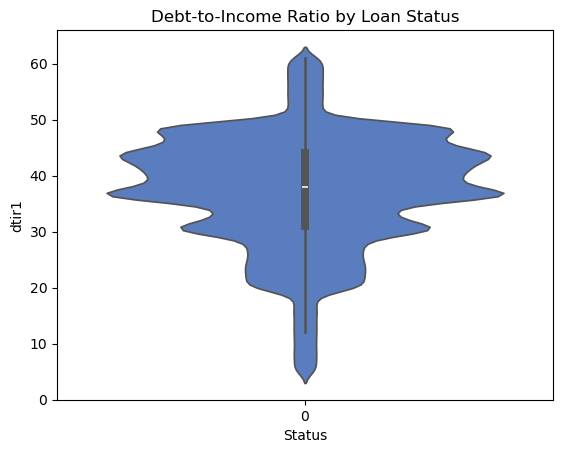

In [22]:
sns.violinplot(data=df, x='Status', y='dtir1', palette='muted')
plt.title("Debt-to-Income Ratio by Status")
plt.show()


# 8. Loan to Value (LTV) by Loan Status

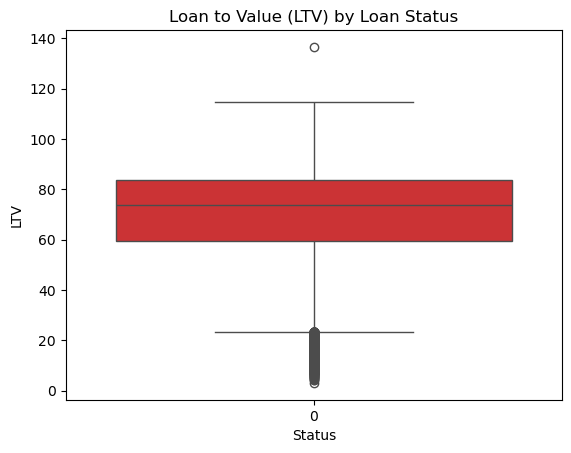

In [23]:
sns.boxplot(data=df, x='Status', y='LTV', palette='Set1')
plt.title("Loan to Value (LTV) by Loan Status")
plt.show()

# 9. Correlation Heatmap

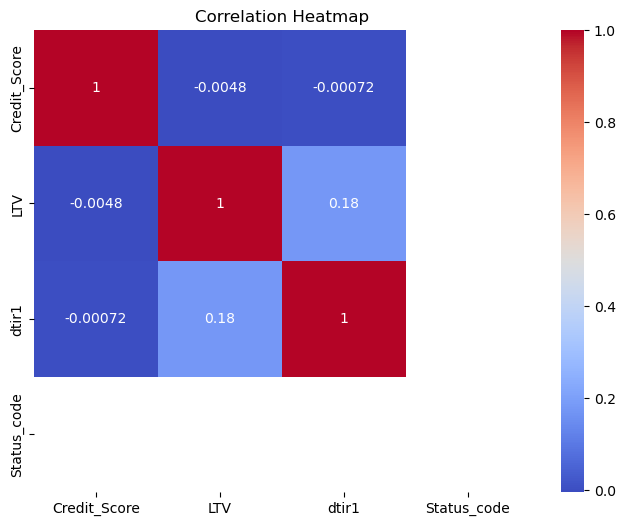

In [24]:
# Select numeric columns
numeric_df = df[['Credit_Score', 'LTV', 'dtir1']]

# Convert Status to numeric
df['Status_code'] = df['Status'].astype(int)  # Already 0/1

plt.figure(figsize=(8,6))
sns.heatmap(df[['Credit_Score', 'LTV', 'dtir1', 'Status_code']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 10. Submission Type vs Loan Status

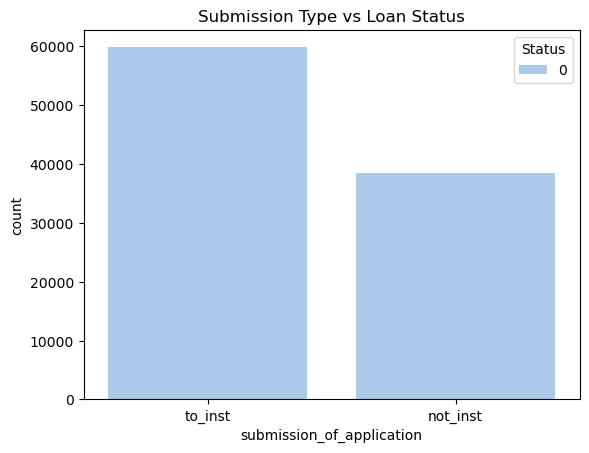

In [25]:
sns.countplot(data=df, x='submission_of_application', hue='Status', palette='pastel')
plt.title("Submission Type vs Loan Status")
plt.show()
